# Scikit-Learn : Visualization of MLP weights on MNIST

13/11/2023

Source : https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

In [1]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [4]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

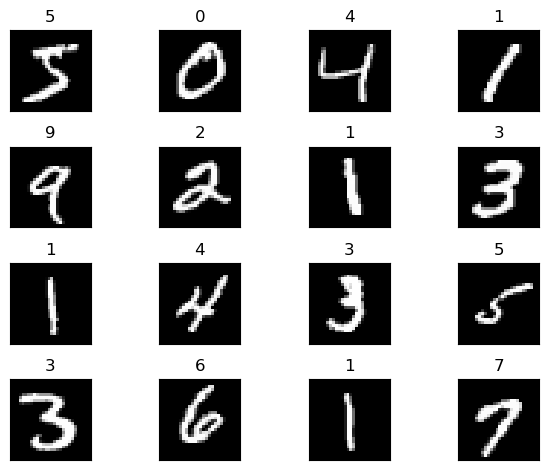

In [12]:
fig, axes = plt.subplots(4, 4)
for i, ax in enumerate(axes.ravel()):
	ax.matshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
	ax.set_xticks(())
	ax.set_yticks(())
	ax.set_title(y[i])

plt.tight_layout()
plt.show()

In [28]:
# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=10,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Iteration 9, loss = 0.04751107
Iteration 10, loss = 0.03916272
Training set score: 0.989190
Test set score: 0.953408


In [18]:
mlp.coefs_[0].shape

(784, 40)

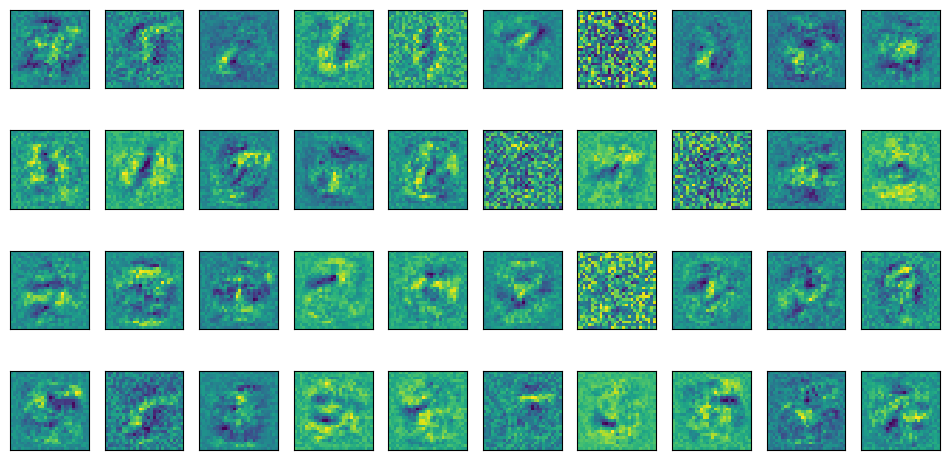

In [26]:
fig, axes = plt.subplots(4, 10, figsize=(12, 6))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
	#ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
	ax.matshow(coef.reshape(28, 28))
	ax.set_xticks(())
	ax.set_yticks(())

plt.show()